<div style="text-align:center">
<h1>Neural Network in Python from Scratch</h1>
<hr>
<h3>In Numpy</h3>
</div>
<hr>

<p style="text-align:right">By: Rahul Kumar Sinha</p>

Classification Problem:

We have two types of objects (Object 0 and Object 1). Every object has a length and width. We need to train our Neural Network to identify the objects based on their dimensions.

In [232]:
# Data Points: length, width and object type(0,1)

data = np.array([[3,   1.5, 1],
                 [2,   1,   0],
                 [4,   1.5, 1],
                 [3,   1,   0],
                 [3.5, 0.5, 1],
                 [2,   0.5, 0],
                 [5.5, 1,   1],
                 [1,   1,   0]])

unknown_object = [4.5,1] # Object type 1

In [233]:
# Libraries imports

import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

### Network
<img src="nn.jpg" style="height:350px;width:600px;float:left">

#### Inputs:
* Length of object as x1
* Width of object as x2

#### Parameters:
* Weights as w1 and w2
* Bais as b

#### Output:
* Predicted Object Type as Y_predicted

Note:
Sigmoid is the activation function.

Mathematical operation performed are - 

> #### a = x1 * w1 + x2 * w2 + b

> #### Y_predicted = sigmoid(a)


#### Sigmoid as Activation function
Input range: -$\infty$ to +$\infty$ <br>
Output range: 0 to 1

In [234]:
# Creating Neural Network

def sigmoid(x):
    return 1/(1-np.exp(-x))

def sigmoid_neuron(x1, x2, w1, w2, b):
    h = x1*w1+x2*w2+b
    return sigmoid(h)

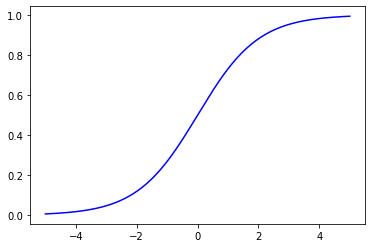

In [235]:
T = np.linspace(-5,5, 1000)
plt.plot(T,sigmoid(T), c='b')

In [258]:
# Initilazing random weights and bais

w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

print([w1, w2, b])

# Initializing few variables need in loop
learning_rate = 0.01
epoch = 10000
batch_size = 8

[-0.39902024187407004, -0.3501336570945399, -1.4910599711529786]


In [259]:
# Training our neural network

loss_list = []

for i  in range(epoch):
    
    error = []
    
    indexes = np.random.choice(range(len(data)), batch_size, replace=False)
    batch = data[indexes]
    
    # Forward Propogation
    for each in batch:
        x1,x2,y = each
        y_predicted = sigmoid_neuron(x1,x2,w1,w2,b)
        error.append(y_predicted-y)
    
    # Calculating the loss
    loss =  np.sum(np.array(error) ** 2) / len(batch)
    
    # Saving epoch, loss and printing after every 10th part of epoch
    if i%(epoch/50) == 0:
        loss_list.append([i,loss])
        print(f"Loss after {i} epochs: ",loss)
    
    # Backward Propagation
    w1 = w1-learning_rate*np.dot(np.array(error),batch[:,0])
    w2 = w2-learning_rate*np.dot(np.array(error),batch[:,1])
    b = b-learning_rate*sum(error)

# Printing Final results
print("\nResult\n","-"*50)
print("Final Weights and Bias: ",w1,w2,b)
print("Final Loss: ", np.sum(np.array(error) ** 2) / len(batch))

Loss after 0 epochs:  0.4715563699554275
Loss after 200 epochs:  0.12080542795185785
Loss after 400 epochs:  0.10491309792373496
Loss after 600 epochs:  0.09530321944686668
Loss after 800 epochs:  0.08865980038193685
Loss after 1000 epochs:  0.08376196521448712
Loss after 1200 epochs:  0.08000193673835256
Loss after 1400 epochs:  0.07702772945721327
Loss after 1600 epochs:  0.07461765551786395
Loss after 1800 epochs:  0.07262449481017855
Loss after 2000 epochs:  0.07094674846743504
Loss after 2200 epochs:  0.06951239539533609
Loss after 2400 epochs:  0.0682691188157071
Loss after 2600 epochs:  0.06717815285617448
Loss after 2800 epochs:  0.06621027138105438
Loss after 3000 epochs:  0.06534309931510623
Loss after 3200 epochs:  0.06455926808387263
Loss after 3400 epochs:  0.0638451247244401
Loss after 3600 epochs:  0.06318981258859745
Loss after 3800 epochs:  0.0625846064217426
Loss after 4000 epochs:  0.062022424632433536
Loss after 4200 epochs:  0.06149746692139463
Loss after 4400 epoc

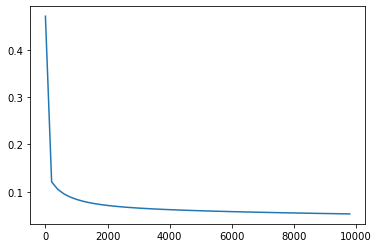

In [260]:
# Loss Graph
plt.plot(np.array(loss_list)[:,0],np.array(loss_list)[:,1])

In [261]:
y_predicted = sigmoid_neuron(unknown_object[0],unknown_object[1],w1,w2,b)
y_predicted

0.9968424624226739

### Little Optimized for fatser computation

In [241]:
def sigmoid_neuron_vec(x, w, b):
    h = np.dot(x,w)+b
    return sigmoid(h)

In [247]:
# Optimized Training our neural network

loss_list = []

for i  in range(epoch):
    
    indexes = np.random.choice(range(len(data)), batch_size, replace=False)
    batch = data[indexes]
    
    
    # Forward Propogation
    x = batch[:,:2]
    y = batch[:,2].reshape(8,1)
    
    y_predicted = sigmoid_neuron_vec(x,w,b)
    
    error = (y_predicted-y)[:,0]
    
    # Calculating the loss
    loss =  np.sum(error ** 2) / len(batch)
    
    # Saving epoch, loss and printing after every 10th part of epoch
    if i%(epoch/10) == 0:
        loss_list.append([i,loss])
        print(f"Loss after {i} epochs: ",loss)
    
    # Backward Propagation
    w1 = w1-learning_rate*np.dot(error,batch[:,0])
    w2 = w2-learning_rate*np.dot(error,batch[:,1])
    b = b-learning_rate*sum(error)

# Printing Final results
print("\nResult\n","-"*50)
print("Final Weights and Bias: ",w1,w2,b)
print("Final Loss: ", np.sum(np.array(error) ** 2) / len(data))

Loss after 0 epochs:  0.07769002858092207
Loss after 1000 epochs:  0.07769002858092208
Loss after 2000 epochs:  0.07769002858092208
Loss after 3000 epochs:  0.07769002858092208
Loss after 4000 epochs:  0.07769002858092207
Loss after 5000 epochs:  0.07769002858092208
Loss after 6000 epochs:  0.07769002858092207
Loss after 7000 epochs:  0.07769002858092208
Loss after 8000 epochs:  0.07769002858092208
Loss after 9000 epochs:  0.07769002858092208

Result
 --------------------------------------------------
Final Weights and Bias:  109.48601379139564 41.46420291481409 -5.57054621623768
Final Loss:  0.07769002858092208
